# Visualizing the solutions of harmonic oscillator problem

In [9]:
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Eigenfunctions and eigenvalues of Harmonic oscillator problem

The harmonic oscillator is often used as an approximate model for the behaviour of some quantum systems, for example the vibrations of a diatomic molecule. Potential energy is a simple quadratic function of dsiplacement:

$V(x) = \frac{1}{2}kx^2$

The Schrödinger equation for a particle of mass m moving in one dimension in a potential

$\psi(x) = -\frac{\hbar^2}{2m}\frac{d}{dx^2} + \frac{1}{2}kx^2$

The eigenfunctions are expressed in terms of Hermite polynomials $H_v(x)$, special functions well known in mathematical physics. Where $N_v$ is a normalization factor.

$\psi(x) = N_vH_v(x)e^{-x^2/2}$

$H_v(x) = (−1)^v(e^{x^2})\frac{d^v}{dx^v}(e^{-x^2})$

$N_v = (\sqrt{\pi}2^v v!)^{-1/2}$ 

| Table of the first 4 Hermite Polynomials |
|------------------------------------------|
| $H_0 = 1$                                |
| $H_1 = 2x$                               |
| $H_2 = 4x^2 - 2$                         |
| $H_3 = 8x^3 - 12$                        |

## Plotting hermite polynomials using scipy and numpy and matplotlib

The `scipy.special` has large collection of special functions inclduing hermite polynomials! While polynomials listed in the table are simple enough to hand type we are going to be lazy and use `scipy.special.hermite` wich provides us with polynomials of any degree to use in numerical calculations!

In [2]:
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
from math import factorial

#Check to see if they match the table
H=hermite(3)
print(H)

   3
8 x - 12 x


Now let us plot hermite polynomials Hv(x) on some range of values x

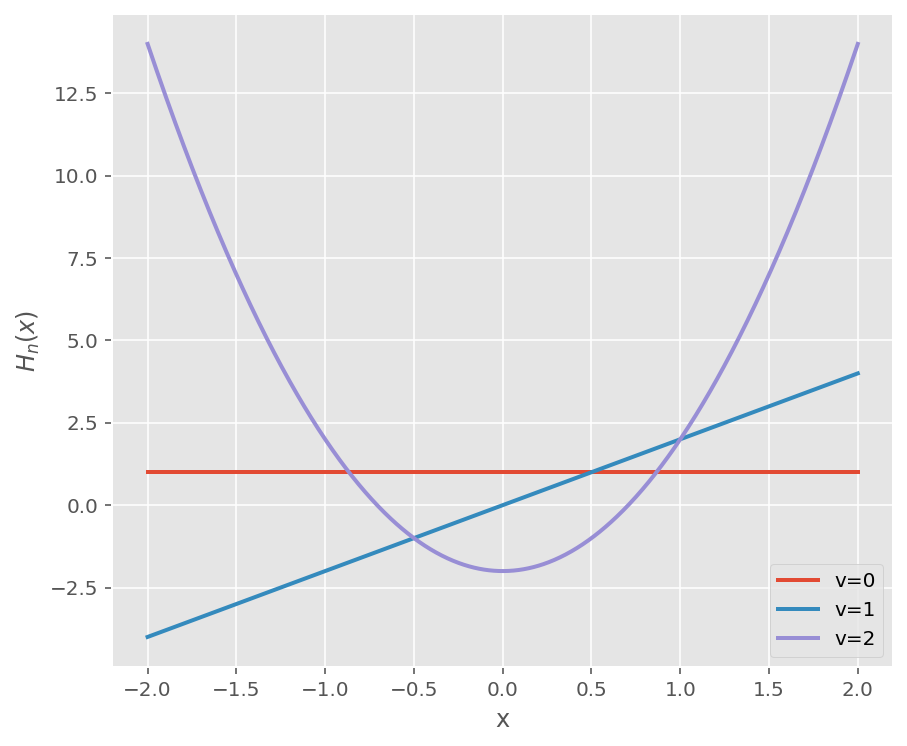

In [13]:
x=np.linspace(-2,2,1000) # Range needs to be specified for plotting functions of x

plt.figure(figsize=(7, 6))
for v in range(0,3):
    
    H=hermite(v)
    
    f=H(x)
    
    plt.plot(x,f, label='v=%i'%v, lw=2)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')
plt.legend()

## Harmonic Oscillator wave functions

Now we can write down harmonic oscillator wave functions which are product of Hermite polynomials with a gaussian function and normalization factor:

In [14]:
def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)
    
    return Psix

## Visualize eigenfunctions of harmonic oscillator

In [22]:
@widgets.interact(v=(0,50))


def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y= psi(v,x)
    plt.figure(figsize=(7, 6))
    plt.plot(x,y,lw=2)
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

## Exercise - create the same function as above - but for the probability of finding the particle at $x$


## Plot Eigenvalues and eigenfunctions of harmonic oscillator

In [24]:
def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2

First we decide on how many levels to plot and what is the range for x.

In [26]:
# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)

Next we plot classical potential and then plot eigenfunctions padded up by eigenvalues to have textbook like picture

Text(0, 0.5, '$\\psi_n(x)$')

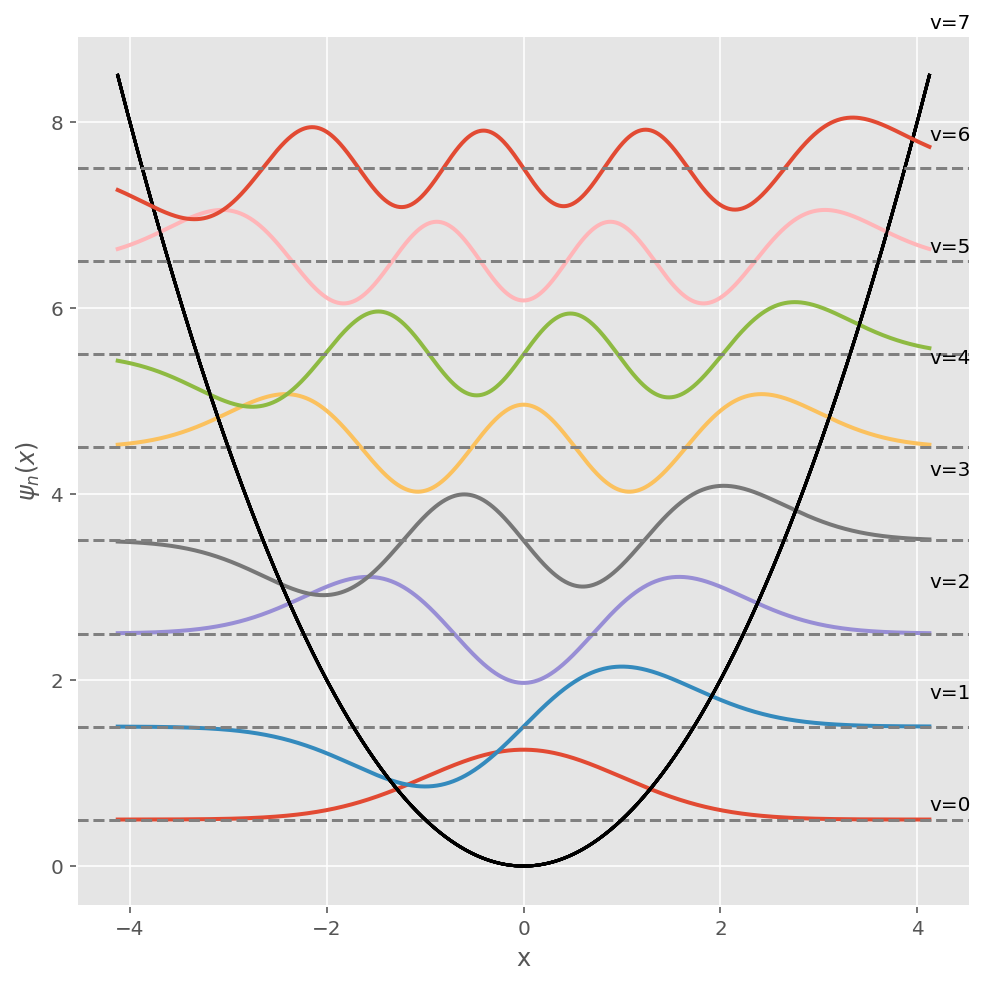

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plot potential V(x)
    ax.plot(x,V(x),color='black')
    
    # plot psi squared which we shift up by values of energy
    ax.plot(x,psi(v,x) + E(v), lw=2)
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

## Exercise - create the same plot as above but for the probabilities